<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/AP_Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.- Un fabricante necesita 40 000 circuitos impresos por año para la elaboración de cierto producto. El estima que el costo de orden es de \$20 por
pedido y que el costo de almacenamiento es del 20\% del valor promedio
del inventario. Si el costo unitario es de \$2, calcule:

a) la cantidad económica de orden

b) el costo del almacenamiento, el costo de orden y el costo total

c) el número de pedidos por año

In [2]:
def lote1(Q, cu, co, cap):
  # Q = 40000
  # co = 20
  # cap = 0.2
  # cu = 2
  q = np.sqrt(2 * Q * co/(cu *cap))

  can_ped = Q/q

  cost_a = q / 2  * cu * cap
  cost_o = can_ped * co
  cost_t = cost_o + cost_a
  return q, can_ped, cost_a, cost_o, cost_t

In [3]:
Q = 40000
co = 20
cap = 0.2
cu = 2
q, cant, a, o, cost = lote1(Q, cu, co, cap)

res1 = f"a) Lote económico ={int(q)}\nc) Cantidad de ordenes = {int(cant)}\nb) Costo anual de almacenamiento = {int(a)} \n   Costo anual de orden = {int(o)} \n   Costo anual total = {int(cost)}"

print(res1)

# print("Lote económico =",int(q))
# print("Cantidad de ordenes =", int(cant))
# print('Costo anual de almacenamiento = ',int(a))
# print('Costo anual de orden = ',int(o))
# print("Costo anual total =",int(cost))

a) Lote económico =2000
c) Cantidad de ordenes = 20
b) Costo anual de almacenamiento = 400 
   Costo anual de orden = 400 
   Costo anual total = 800


2.- Los siguientes artículos han sido registrados en el fichero (kárdex) de una
compañía así como su costo anual de compra:

| No. | Código | Costo anual |
|-|-|-|
|1 |MO7 |\$ 32 000|
|2 |N14 |\$ 1 200|
|3 |M23 |\$ 37 000|
|4 |O26 |\$ 14 000|
|5 |P36 |\$ 108 000|
|6 |M37 |\$ 3 700|
|7 |N45 |\$ 28 000|
|8 |P53 |\$ 19 000|
|9 |077 |\$ 8 100|
|10 |P 84 |\$ 65 000|

Se desea que usted:

a) clasifique estos artículos según el método ABC;

b) indique el valor monetario y el porcentaje de cada clase;

c) calcule la cantidad económica por ordenar del artículo P36, cuyo costo unitario es de \$20, sabiendo que el costo de orden es de \$50 por pedido y el costo anual de almacenamiento es de \$5 por unidad.

In [4]:
def met_ABC(data, a, b, c):
  data.sort(reverse = True)
  s = sum(data)
  x = np.array(data)
  p = x/s

  pa, tipo = [], []
  for i in range(len(p)):
    pr = sum(p[:i+1])
    pa.append(pr)
    if pr <= a:
      tipo.append('A')
    elif pr <= b:
      tipo.append('B')
    else:
      tipo.append('C')
  return x, p, pa, tipo

In [5]:
def graf_ABC(data, prob_ac, tipo):
  c = []
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      c.append('g')
    elif tipo[i] == 'B':
      c.append('orange')
    else:
      c.append('r')

  d = np.array(data) / 1000
  eje = d.astype(str)

  fig, ax = plt.subplots()
  ax.bar(eje, x, color = c)
  ax2 = ax.twinx()
  plt.ylim(0,1.05)
  ax2.plot(eje, prob_ac, 'o-' ,color = 'c')

  plt.title('Gráfica de Pareto Metodo ABC')
  plt.xlabel('Costo, miles')
  plt.savefig("Graf_ABC.png", format = 'png', dpi = 144)
  plt.show()

In [6]:
def resumen_tipo(data, prob, tipo):
  sa, sb, sc = 0, 0, 0
  ma, mb, mc = 0, 0, 0
  pa, pb, pc = 0, 0, 0
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      sa+=1
      ma+=data[i]
      pa+=prob[i]
    elif tipo[i] == 'B':
      sb+=1
      mb+=data[i]
      pb+=prob[i]
    else:
      sc+=1
      mc+=data[i]
      pc+=prob[i]

  ls = [sa/(sa+sb+sc), sb/(sa+sb+sc), sc/(sa+sb+sc)]
  lm = [ma, mb, mc]
  lp = [pa, pb, pc]

  r = [np.round(lm), np.round(ls,5), np.round(lp,5)]
  r = pd.DataFrame(np.transpose(r), index = ['A','B','C'], columns = ["Valor monetario", "Porcentaje", "Porcentaje monetario"])
  return r

    Costo Porcentaje Acumulado Clasificacion
0  108000    0.34177   0.34177             A
1   65000     0.2057   0.54747             A
2   37000    0.11709   0.66456             A
3   32000    0.10127   0.76582             A
4   28000    0.08861   0.85443             B
5   19000    0.06013   0.91456             B
6   14000     0.0443   0.95886             B
7    8100    0.02563   0.98449             C
8    3700    0.01171    0.9962             C
9    1200     0.0038       1.0             C 



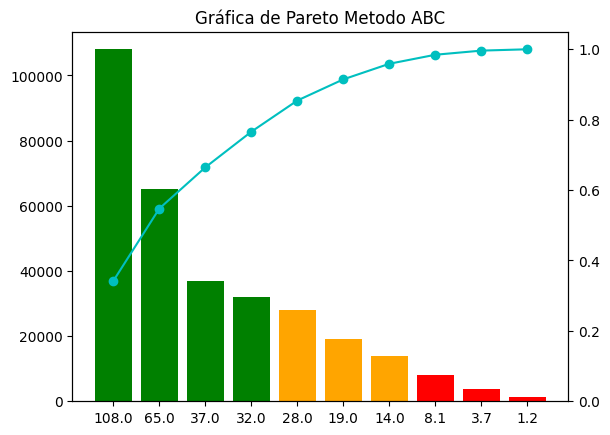

   Valor monetario  Porcentaje  Porcentaje monetario
A         242000.0         0.4               0.76582
B          61000.0         0.3               0.19304
C          13000.0         0.3               0.04114


In [7]:
x = [32000, 1200, 37000, 14000, 108000, 3700, 28000, 19000, 8100, 65000]
x, p, a, tipo = met_ABC(x, 0.80, 0.96, 1.00)

t = [x,np.round(p, 5),np.round(a, 5),tipo]
t = pd.DataFrame(np.transpose(t), columns = ['Costo', 'Porcentaje', 'Acumulado', 'Clasificacion'])

print(t,'\n')

graf_ABC(x,a,tipo)

r = resumen_tipo(x,p,tipo)
res2 = 'a)\n' + t.to_string() + '\n\nb)\n' + r.to_string()
print(r)

In [8]:
def lote2(Q, co, ca):
  q = np.sqrt(2 * Q * co/ca)

  can_ped = Q/q

  cost_a = q / 2 * ca
  cost_o = can_ped * co
  cost_t = cost_o + cost_a
  return q, can_ped, cost_a, cost_o, cost_t

In [9]:
cu = 20
Q = x[0] / cu
# print(Q)
co = 50
ca = 5
q, c, a, o, ct = lote2(Q, co, ca)

cosa = f"c) Lote económico = {round(q, 2)}\n   Cantidad de ordenes = {round(c)}\n   Costo anual de almacenamiento = {round(a,2)}\n   Costo anual de orden = {round(o,2)}\n   Costo anual total = {round(ct,2)}"
res2 += "\n\n" + cosa
print(cosa)

c) Lote económico = 328.63
   Cantidad de ordenes = 16
   Costo anual de almacenamiento = 821.58
   Costo anual de orden = 821.58
   Costo anual total = 1643.17


3.- Una compañía desea establecer una regla de administración de inventarios para un producto cuyo consumo anual se eleva a aproximadamente \$250 000. Después de un estudio detallado de los principales registros contables, se ha colectado la siguiente información:

\begin{array}{lr}
\textrm{Consumo estimado para el año de 1981} & 105 000 \textrm{unidades}\\
\textrm{Costo unitario promedio} & \$2.50\\
\textrm{Alquiler del almacén} & \$0.25/\textrm{unidad}\\
\textrm{Costo de preparación de un pedido} & \$21.50/\textrm{pedido}\\
\textrm{Seguro de los inventarios} & 10\% \textrm{ de su valor}\\
\textrm{Costo promedio de recepción} & \$20/\textrm{pedido}\\
\textrm{Gastos postales} & \$0.50/\textrm{pedido}\\
\textrm{Pérdidas por deterioro} & 2\%\\
\textrm{Falta de ganancia en intereses} & 10\%
\end{array}

Calcule:

a) el costo de orden y almacenamiento;

b) la cantidad económica por ordenar para el año de 1981;

c) el costo de aprovisionamiento y de almacén;

d) la cantidad por ordenar, considerando la hipótesis de los siguientes descuentos por cantidad:

\begin{array}{l c}
1\textrm{ a }9 999 & \$2.50 \textrm{ por unidad}\\
10 000 \textrm{ a } 19 999 & \$2.40 \textrm{ por unidad}\\
20 000 \textrm{ o más} & \$2.35 \textrm{ por unidad}\\
\end{array}

In [10]:
consumo_anual = 250000

Q = 105000

# Costo por unidad
cu = 2.5
alquiler = 0.25

#Costo por orden o pedido
preparacion_pedido = 21.5
recepcion = 0.20
postales = 0.5

#Porcentaje de valor de inventario
seguro_inventarios = 0.10

#Porcentajes
deterioro = 0.02
intereses = 0.10

In [11]:
costo_almacenamiento_anual = consumo_anual*(intereses + seguro_inventarios + deterioro) + consumo_anual/cu * (alquiler)
coa = preparacion_pedido + recepcion + postales
costo_orden_anual = consumo_anual - costo_almacenamiento_anual

res3 = f'a) Costo anual de almacenamiento = {costo_almacenamiento_anual}\n   Costo anual de aprovisionamiento (orden, pedido) = {costo_orden_anual}\n   Cantidad de ordenes, pedido = {np.ceil(costo_orden_anual/coa)}'
print(res3)

a) Costo anual de almacenamiento = 80000.0
   Costo anual de aprovisionamiento (orden, pedido) = 170000.0
   Cantidad de ordenes, pedido = 7658.0


In [12]:
Q = Q
cu = cu
ca = alquiler + cu*(seguro_inventarios + intereses + deterioro)
co = preparacion_pedido + recepcion + postales

cosa = f'Consumo estimado: {Q}\nCosto unitario: {cu}\nCosto de almacenamiento por unidad: {ca}\nCosto por orden: {co}'
res3 += '\n\n' + cosa

q, cp, cal, cor, ct = lote2(Q, co, ca)

cosa = f"b) Lote económico: {round(q, 4)}\n   Cantidad de pedidos al año: {np.ceil(cp)}"
res3 += '\n\n' + cosa
print(cosa)

cosa = f"c) Costo de almacenamiento anual: {round(cal, 2)}\n   Costo de orden anual: {round(cor, 2)}\n   Costo anual total: {round(ct, 2)}"
res3 += '\n\n' + cosa
print(cosa)

b) Lote económico: 2414.0215
   Cantidad de pedidos al año: 44.0
c) Costo de almacenamiento anual: 965.61
   Costo de orden anual: 965.61
   Costo anual total: 1931.22


In [13]:
# 1 - 9,999           $2.50
# 10,000 - 19,999     $2.40
# 20,000 - más        #2.35

qi = np.array([100, 1000, q, 5000, 10000, 15000, 19999, 20000, 25000, 30000])
CC = qi * cu
CO = Q/qi * co
CA = qi/2 * ca
CT = CC + CA + CO
td = pd.DataFrame([CC, CO, CA, CT], index = ['Costo anual de compra', 'Costo de orden', 'Costo de almacenamiento', 'Costo total'], columns = qi)
print(td)
res3 += '\n\nc)\n' + td.to_string()
conclusion = "Como se puede observar en la tabla anterior, conviene que la cantidad a ordenar esté en la primer categoría."
print(conclusion)
res3 += '\n\n'+conclusion

                         100.000000    1000.000000   2414.021541   \
Costo anual de compra           250.0        2500.0   6035.053852   
Costo de orden                23310.0        2331.0    965.608616   
Costo de almacenamiento          40.0         400.0    965.608616   
Costo total                   23600.0        5231.0   7966.271085   

                         5000.000000   10000.000000  15000.000000  \
Costo anual de compra         12500.0       25000.0       37500.0   
Costo de orden                  466.2         233.1         155.4   
Costo de almacenamiento        2000.0        4000.0        6000.0   
Costo total                   14966.2       29233.1       43655.4   

                         19999.000000  20000.000000  25000.000000  \
Costo anual de compra    49997.500000      50000.00      62500.00   
Costo de orden             116.555828        116.55         93.24   
Costo de almacenamiento   7999.600000       8000.00      10000.00   
Costo total              58113.6

4.- Usted debe proporcionar a sus clientes, todos los lunes, un promedio de de 400 unidades de cierto producto. Usted obtiene dicho producto de un fabricante a \$60 por unidad. El costo de orden y de transporte es de \$150 por pedido. El costo de almacenamiento se estima en un 20\% del costo de los productos almacenados. Hay 50 semanas de trabajo en el año. Usted desea elaborar una regla de administración de inventarios para determinar:

a) la cantidad económica por ordenar;

b) el costo total de aprovisionamiento y almacenamiento;

c) el punto de reorden y el nivel máximo del inventario, teniendo en cuenta que usted desea mantener 5 unidades como inventario de seguridad y que la demora promedio de la entrega es de una semana.

In [14]:
def reorden(consumo_diario, demora, inventario_seguridad = 0):
  return consumo_diario * demora + inventario_seguridad

In [15]:
consumo = 400
semanas = 50
Q = consumo*semanas
cu = 60
co = 150
cap = 0.2
q, n, caa, coa, ct = lote1(Q, cu, co, cap)

res4 = f"   Lote económico: {round(q, 4)}\n   Cantidad de pedidos al año: {np.ceil(n)}\n   Costo de almacenamiento anual: {round(caa, 2)}\n   Costo de orden anual: {round(coa, 2)}\n   Costo anual total: {round(ct, 2)}"
print(res4)

demora = 7
r = reorden(400/7, 7, 5)

cosa = f'Punto de reorden: {r}'
print(cosa)
res4 += '\n\n' + cosa

m = 5 + np.ceil(q)
cosa = f"Nivel máximo de inventario : {m}"
print(cosa)
res4 += '\n\n' + cosa

   Lote económico: 707.1068
   Cantidad de pedidos al año: 29.0
   Costo de almacenamiento anual: 4242.64
   Costo de orden anual: 4242.64
   Costo anual total: 8485.28
Punto de reorden: 405.0
Nivel máximo de inventario : 713.0


#resultados

In [16]:
texto = open("Resultados T5.txt", "w")

texto.write('1.- ')
texto.write(res1)

texto.write('\n\n\n2.- ')
texto.write(res2)

texto.write('\n\n\n3.-')
texto.write(res3)

texto.write('\n\n\n4.-')
texto.write(res4)

texto.close()